In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [5]:
top_10_apps = df['app_name'].value_counts().head(10)
top_10_apps

PAYDAY 2              88973
DayZ                  88850
Terraria              84828
Rust                  77037
Dota 2                73541
Rocket League         54227
Undertale             51918
Left 4 Dead 2         50980
Warframe              48229
Grand Theft Auto V    42374
Name: app_name, dtype: int64

In [6]:
cod_df = df[df['app_name'] == 'Call of Duty: Black Ops III']
cod_df

,app_id,app_name,review_text,review_score,review_votes
3977109,311210,Call of Duty: Black Ops III,Call of Duty: Black Ops III is a game which I ...,-1,1
3977110,311210,Call of Duty: Black Ops III,Let's all agree we got this for zombies,1,1
3977111,311210,Call of Duty: Black Ops III,It only took until 2065 for soldiers to finall...,1,0
3977112,311210,Call of Duty: Black Ops III,Updated 4/08/2016 MULTIPLAYER REVIEW ONLY,-1,1
3977113,311210,Call of Duty: Black Ops III,"game costs €99,99 and has microtransactions in...",-1,1
...,...,...,...,...,...
4001647,311210,Call of Duty: Black Ops III,This is a great game really. Dont listen to th...,1,0
4001648,311210,Call of Duty: Black Ops III,Love it,1,0
4001649,311210,Call of Duty: Black Ops III,I tried my best to enjoy this game but some ♥♥...,-1,0
4001650,311210,Call of Duty: Black Ops III,It crashes. Alot. I've played it for about 3 h...,-1,0


In [7]:
proportion_counts = cod_df['review_score'].value_counts(normalize=True)
proportion_counts

 1    0.571079
-1    0.428921
Name: review_score, dtype: float64

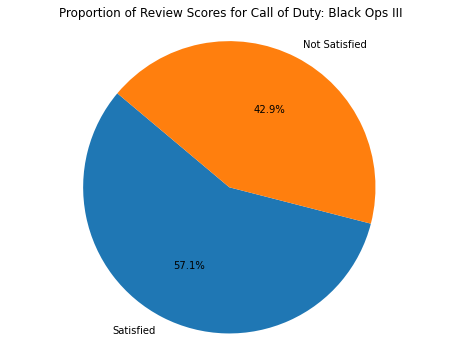

In [8]:
import matplotlib.pyplot as plt
labels = ['Satisfied','Not Satisfied']

plt.figure(figsize=(8, 6))
plt.pie(proportion_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Review Scores for Call of Duty: Black Ops III')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
cod_df['review_text'] = cod_df['review_text'].astype(str)

C:\Users\potat\AppData\Local\Temp\ipykernel_26212\2575248753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cod_df['review_text'] = cod_df['review_text'].astype(str)


In [10]:
all_caps_mask = cod_df['review_text'].apply(lambda x: x.isupper())
all_caps_count = all_caps_mask.sum()
one_word_mask = cod_df['review_text'].apply(lambda x: len(x.split()) == 1)
one_word_count = one_word_mask.sum()
cod_df = cod_df[~(all_caps_mask | one_word_mask)]

print(f"Count of all-caps reviews removed: {all_caps_count}")
print(f"Count of one-word reviews removed: {one_word_count}")

Count of all-caps reviews removed: 373
Count of one-word reviews removed: 368


In [11]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
custom_stop_words = {'game','black','call','duty','ops','III'}

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def preprocess_text(text):
    

    text = ''.join([char.lower() if char.isalnum() or char.isspace() else ' ' for char in text])
    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.lower() not in custom_stop_words]
    
    pos_tags = nltk.pos_tag(filtered_tokens)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
    
    return lemmatized
    

cod_df['Processed Review Text'] = cod_df['review_text'].apply(preprocess_text)

cod_df.head()


C:\Users\potat\AppData\Local\Temp\ipykernel_26212\1747521278.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cod_df['Processed Review Text'] = cod_df['review_text'].apply(preprocess_text)


,app_id,app_name,review_text,review_score,review_votes,Processed Review Text
3977109,311210,Call of Duty: Black Ops III,Call of Duty: Black Ops III is a game which I ...,-1,1,"[iii, actually, thoroughly, enjoy, gun, play, ..."
3977110,311210,Call of Duty: Black Ops III,Let's all agree we got this for zombies,1,1,"[let, agree, get, zombie]"
3977111,311210,Call of Duty: Black Ops III,It only took until 2065 for soldiers to finall...,1,0,"[take, soldier, finally, learn, swim, multipla..."
3977112,311210,Call of Duty: Black Ops III,Updated 4/08/2016 MULTIPLAYER REVIEW ONLY,-1,1,"[update, multiplayer, review]"
3977113,311210,Call of Duty: Black Ops III,"game costs €99,99 and has microtransactions in...",-1,1,"[cost, microtransactions, point, microtransact..."


In [12]:
with open('positive-words-LM.txt', 'r') as file:
    positive_words = set(word.lower() for word in file.read().split())

with open('negative-words-LM.txt', 'r') as file:
    negative_words = set(word.lower() for word in file.read().split())

In [13]:
def calculate_sentiment_score(token_list):
    pos_count = sum(1 for token in token_list if token.lower() in positive_words)
    neg_count = sum(1 for token in token_list if token.lower() in negative_words)
    return pos_count - neg_count
cod_df['sentiment_score'] = cod_df['Processed Review Text'].apply(calculate_sentiment_score)
cod_df

C:\Users\potat\AppData\Local\Temp\ipykernel_26212\143728252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cod_df['sentiment_score'] = cod_df['Processed Review Text'].apply(calculate_sentiment_score)


,app_id,app_name,review_text,review_score,review_votes,Processed Review Text,sentiment_score
3977109,311210,Call of Duty: Black Ops III,Call of Duty: Black Ops III is a game which I ...,-1,1,"[iii, actually, thoroughly, enjoy, gun, play, ...",1
3977110,311210,Call of Duty: Black Ops III,Let's all agree we got this for zombies,1,1,"[let, agree, get, zombie]",0
3977111,311210,Call of Duty: Black Ops III,It only took until 2065 for soldiers to finall...,1,0,"[take, soldier, finally, learn, swim, multipla...",0
3977112,311210,Call of Duty: Black Ops III,Updated 4/08/2016 MULTIPLAYER REVIEW ONLY,-1,1,"[update, multiplayer, review]",0
3977113,311210,Call of Duty: Black Ops III,"game costs €99,99 and has microtransactions in...",-1,1,"[cost, microtransactions, point, microtransact...",0
...,...,...,...,...,...,...,...
4001647,311210,Call of Duty: Black Ops III,This is a great game really. Dont listen to th...,1,0,"[great, really, dont, listen, bad, review, mul...",2
4001648,311210,Call of Duty: Black Ops III,Love it,1,0,[love],0
4001649,311210,Call of Duty: Black Ops III,I tried my best to enjoy this game but some ♥♥...,-1,0,"[try, best, enjoy, break, lose, mind, try, rip...",-1
4001650,311210,Call of Duty: Black Ops III,It crashes. Alot. I've played it for about 3 h...,-1,0,"[crash, alot, played, hour, write, crashed, ti...",0


In [14]:
sentiment_score_counts = cod_df['sentiment_score'].value_counts().sort_index()
sentiment_score_counts

-82        1
-31        2
-19        1
-18        2
-17        1
-15        2
-14        1
-13        4
-12        2
-11        5
-10       11
-9        14
-8        30
-7        29
-6        76
-5       113
-4       248
-3       496
-2      1160
-1      3247
 0     10340
 1      5102
 2      1641
 3       643
 4       312
 5       152
 6        68
 7        40
 8        15
 9        21
 10        7
 11        4
 12        8
 13        2
 17        1
 18        1
 19        2
 51        1
Name: sentiment_score, dtype: int64

In [15]:
import numpy as np

expanded_scores = np.repeat(sentiment_score_counts.index.values, sentiment_score_counts.values)
percentiles = {
    '1th percentile': np.percentile(expanded_scores, 1),
    '99th percentile': np.percentile(expanded_scores, 99)
}

print(f"1th percentile: {percentiles['1th percentile']}")
print(f"99th percentile: {percentiles['99th percentile']}")

1th percentile: -5.0
99th percentile: 5.0


In [16]:
filtered_df = cod_df[(cod_df['sentiment_score'] <= 5) & (cod_df['sentiment_score'] >= -5)]
total_reviews = cod_df.shape[0]
remaining_reviews = filtered_df.shape[0]
removed_reviews = total_reviews - remaining_reviews
removed_reviews

351

In [17]:
docs = cod_df['Processed Review Text'].tolist()
docs[0]

['iii',
 'actually',
 'thoroughly',
 'enjoy',
 'gun',
 'play',
 'new',
 'mechanic',
 'add',
 'interesting',
 'twist',
 'series',
 'however',
 'go',
 'write',
 'positive',
 'review',
 'simply',
 'mark',
 'cheat',
 'firstly',
 'even',
 'touch',
 'multiplayer',
 'mode',
 'iii',
 'anyone',
 'read',
 'review',
 'check',
 'profile',
 'see',
 'absolutely',
 'interest',
 'multiplayer',
 'side',
 'type',
 'playing',
 'single',
 'player',
 'campaign',
 'offline',
 'mode',
 'secondly',
 'even',
 'know',
 'cheat',
 'even',
 'want',
 'one',
 'matter',
 'really',
 'irk',
 'even',
 'cheat',
 'single',
 'player',
 'mode',
 'would',
 'anyone',
 'get',
 'ban',
 'first',
 'place',
 'surely',
 'ban',
 'play',
 'multiplayer',
 'game',
 'come',
 'play',
 'multiplayer',
 'people',
 'know',
 'know',
 'sort',
 'person',
 'people',
 'read',
 'probably',
 'think',
 'throw',
 'toy',
 'pram',
 'believe',
 'wish',
 'end',
 'day',
 'heed',
 'warn',
 'though',
 'due',
 'lack',
 'support',
 'steam',
 'treyarch',
 'abs

In [18]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Flatten list of tokens from all reviews
all_tokens = [token for sublist in cod_df['Processed Review Text'] for token in sublist]

# Find bigrams that appear 50 times or more
bigram_finder = BigramCollocationFinder.from_words(all_tokens)
bigram_finder.apply_freq_filter(10)
bigrams = dict(bigram_finder.ngram_fd).keys()

# Re-integrate bigrams into tokens and remove individual words forming the bigram
for index, row in cod_df.iterrows():
    review_tokens = row['Processed Review Text']
    if not review_tokens:  # Check if the list is empty
        continue  # Skip processing for empty lists

    new_tokens = []
    skip_next = False
    for i in range(len(review_tokens) - 1):
        if skip_next:
            skip_next = False
            continue
        if (review_tokens[i], review_tokens[i+1]) in bigrams:
            new_tokens.append(review_tokens[i] + '_' + review_tokens[i+1])
            skip_next = True
        else:
            new_tokens.append(review_tokens[i])

    # Append the last token if it's not part of a bigram and the list is not empty
    if not skip_next and review_tokens:
        new_tokens.append(review_tokens[-1])
    
    cod_df.at[index, 'Processed Review Text'] = new_tokens

# Display the DataFrame
cod_df.head()

,app_id,app_name,review_text,review_score,review_votes,Processed Review Text,sentiment_score
3977109,311210,Call of Duty: Black Ops III,Call of Duty: Black Ops III is a game which I ...,-1,1,"[iii, actually, thoroughly, enjoy, gun_play, n...",1
3977110,311210,Call of Duty: Black Ops III,Let's all agree we got this for zombies,1,1,"[let, agree, get_zombie]",0
3977111,311210,Call of Duty: Black Ops III,It only took until 2065 for soldiers to finall...,1,0,"[take, soldier, finally, learn, swim, multipla...",0
3977112,311210,Call of Duty: Black Ops III,Updated 4/08/2016 MULTIPLAYER REVIEW ONLY,-1,1,"[update, multiplayer_review]",0
3977113,311210,Call of Duty: Black Ops III,"game costs €99,99 and has microtransactions in...",-1,1,"[cost, microtransactions, point, microtransact...",0


In [19]:
positive_reviews = cod_df[cod_df['review_score'] == 1]['Processed Review Text'].tolist()
negative_reviews = cod_df[cod_df['review_score'] == -1]['Processed Review Text'].tolist()

In [20]:
from gensim import corpora, models

# Helper function to train LDA
def train_lda(data):
    dictionary = corpora.Dictionary(data)
    corpus = [dictionary.doc2bow(text) for text in data]
    lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
    return lda_model

# Train LDA for positive reviews
lda_positive = train_lda(positive_reviews)

# Train LDA for negative reviews
lda_negative = train_lda(negative_reviews)


In [21]:
# Print topics from positive reviews
print("Positive Review Topics:")
for idx, topic in lda_positive.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

# Print topics from negative reviews
print("\nNegative Review Topics:")
for idx, topic in lda_negative.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

Positive Review Topics:
Topic: 0 
Words: 0.007*"map" + 0.006*"like" + 0.006*"zombie" + 0.006*"campaign" + 0.006*"get" + 0.005*"multiplayer" + 0.004*"gun" + 0.004*"story" + 0.004*"player" + 0.004*"make"
Topic: 1 
Words: 0.012*"nice" + 0.007*"server" + 0.007*"custom_zombie" + 0.006*"recommend" + 0.006*"zombie" + 0.006*"game" + 0.005*"treyarch" + 0.005*"play" + 0.005*"cod" + 0.005*"day"
Topic: 2 
Words: 0.026*"mod_tool" + 0.024*"zombie" + 0.020*"best" + 0.012*"mod" + 0.012*"u" + 0.010*"best_ever" + 0.010*"amaze" + 0.009*"good" + 0.008*"awsome" + 0.007*"suck"
Topic: 3 
Words: 0.008*"run" + 0.007*"problem" + 0.006*"fps" + 0.006*"issue" + 0.006*"pc" + 0.006*"fix" + 0.005*"computer" + 0.004*"setting" + 0.004*"fine" + 0.004*"graphic"
Topic: 4 
Words: 0.052*"team_fortress" + 0.021*"awesome" + 0.009*"good" + 0.009*"pretty_good" + 0.007*"like" + 0.007*"2team_fortress" + 0.005*"wish" + 0.005*"buy" + 0.005*"multiplayer" + 0.004*"ign"
Topic: 5 
Words: 0.031*"good" + 0.005*"max_setting" + 0.004*"warf

In [22]:
import re
for i,topic in lda_positive.print_topics(10):
    print(f'Top 10 words for topic #{i+1}:')
    print(",".join(re.findall('".*?"',topic)))
    print('\n')

Top 10 words for topic #1:
"map","like","zombie","campaign","get","multiplayer","gun","story","player","make"


Top 10 words for topic #2:
"nice","server","custom_zombie","recommend","zombie","game","treyarch","play","cod","day"


Top 10 words for topic #3:
"mod_tool","zombie","best","mod","u","best_ever","amaze","good","awsome","suck"


Top 10 words for topic #4:
"run","problem","fps","issue","pc","fix","computer","setting","fine","graphic"


Top 10 words for topic #5:
"team_fortress","awesome","good","pretty_good","like","2team_fortress","wish","buy","multiplayer","ign"


Top 10 words for topic #6:
"good","max_setting","warfare","hardware","would","oh_baby","video_card","spray","medium_setting","minute"


Top 10 words for topic #7:
"bad","fun","game","play","much","though","still","really","cod","great"


Top 10 words for topic #8:
"one_best","really_good","cod_since","fun_play","starter_pack","would_buy","iw","cant_wait","mod","good_fun"


Top 10 words for topic #9:
"fun","love","in

In [23]:
import re
for i,topic in lda_negative.print_topics(10):
    print(f'Top 10 words for topic #{i+1}:')
    print(",".join(re.findall('".*?"',topic)))
    print('\n')

Top 10 words for topic #1:
"bad","another","well","ing","end","garbage","want","always","gameplay","game"


Top 10 words for topic #2:
"fps","pc","suck","setting","graphic","play","stutter","connection_interrupt","guy","ram"


Top 10 words for topic #3:
"nice","bore","mark","one_like","ghz_gb","genius","bad_bad","titanfall","repetitive","dead"


Top 10 words for topic #4:
"david","cancer","drm","everywhere","knight","batman_arkham","super_laggy","want_say","optimize_pc","hacker"


Top 10 words for topic #5:
"gt","campaign","supply_drop","server","kill","multiplayer","zombie","gun","weapon","battlefield"


Top 10 words for topic #6:
"ever_play","cod","crap","iii","dissapointing","probably_bad","bad_port","piece","overall","battlefield"


Top 10 words for topic #7:
"cheat_cheat","movie","suicide","great","u_get","year_old","shame","scope","com","assassin_creed"


Top 10 words for topic #8:
"buy","ing","play","download","work","go","money","write","join","weekend"


Top 10 words for topic

In [33]:
dictionary_positive = corpora.Dictionary(positive_reviews)
corpus_positive = [dictionary_positive.doc2bow(text) for text in positive_reviews]

dictionary_negative = corpora.Dictionary(negative_reviews)
corpus_negative = [dictionary_negative.doc2bow(text) for text in negative_reviews]


In [34]:
from gensim import models, matutils
corpus_positive = [dictionary_positive.doc2bow(text) for text in positive_reviews]
corpus_negative = [dictionary_negative.doc2bow(text) for text in negative_reviews]
dictionary_positive = corpora.Dictionary(positive_reviews)
dictionary_negative = corpora.Dictionary(negative_reviews)


# Compute top topics and their coherence for the positive LDA model
top_topics_positive = lda_positive.top_topics(corpus_positive)  # assuming 'corpus_positive' is already defined
avg_topic_coherence_positive = sum([t[1] for t in top_topics_positive]) / len(top_topics_positive)
print('Average topic coherence for positive reviews: %.4f.' % avg_topic_coherence_positive)

# Compute top topics and their coherence for the negative LDA model
top_topics_negative = lda_negative.top_topics(corpus_negative)  # assuming 'corpus_negative' is already defined
avg_topic_coherence_negative = sum([t[1] for t in top_topics_negative]) / len(top_topics_negative)
print('Average topic coherence for negative reviews: %.4f.' % avg_topic_coherence_negative)

# Display top topics using pprint
from pprint import pprint
print("Top topics for positive reviews:")
pprint(top_topics_positive)

print("\nTop topics for negative reviews:")
pprint(top_topics_negative)


Average topic coherence for positive reviews: -6.8249.
Average topic coherence for negative reviews: -7.4769.
Top topics for positive reviews:
[([(0.0065057348, 'map'),
   (0.006244698, 'like'),
   (0.0062298616, 'zombie'),
   (0.005837847, 'campaign'),
   (0.0055108583, 'get'),
   (0.0049908212, 'multiplayer'),
   (0.0042814193, 'gun'),
   (0.0042276713, 'story'),
   (0.0041843825, 'player'),
   (0.0040873634, 'make'),
   (0.0039960924, 'weapon'),
   (0.0038858138, 'mode'),
   (0.0038170954, 'one'),
   (0.0036325005, 'new'),
   (0.0035738153, 'use'),
   (0.0034862645, 'good'),
   (0.0034774316, 'well'),
   (0.003284729, 'also'),
   (0.0031207555, 'add'),
   (0.0031023603, 'feel')],
  -1.8712715321432873),
 ([(0.0056248796, 'bad'),
   (0.005622606, 'fun'),
   (0.004519502, 'game'),
   (0.0044622924, 'play'),
   (0.0042617386, 'much'),
   (0.00406605, 'though'),
   (0.00401589, 'still'),
   (0.0037326803, 'really'),
   (0.0037282894, 'cod'),
   (0.0036437141, 'great'),
   (0.0034524384,

In [38]:
# Transform the corpus using the LDA model to get the topic distribution for each document
corpus_lda_positive = lda_positive[corpus_positive]
corpus_lda_negative = lda_negative[corpus_negative]

# Convert the transformed corpus to a dense matrix
U_matrix_lda_positive = matutils.corpus2dense(corpus_lda_positive, num_terms=10).T
U_matrix_lda_negative = matutils.corpus2dense(corpus_lda_negative, num_terms=10).T

# Create pandas DataFrames from these matrices
U_matrix_lda_df_positive = pd.DataFrame(U_matrix_lda_positive)
U_matrix_lda_df_negative = pd.DataFrame(U_matrix_lda_negative)

U_matrix_lda_df_positive.to_csv('U_matrix_lda_positive.csv')
U_matrix_lda_df_negative.to_csv('U_matrix_lda_negative.csv')


In [35]:
df_sorted = cod_df.sort_values(by='review_votes', ascending=False)

# Split into positive and negative reviews
positive_reviews = df_sorted[df_sorted['review_score'] == 1]
negative_reviews = df_sorted[df_sorted['review_score'] == -1]


In [41]:
# Calculate the number of positive and negative reviews per page
num_reviews_per_page = 10
positive_ratio = 0.6  # 40% of reviews should be positive
negative_ratio = 0.4  # 60% of reviews should be negative

num_positive_per_page = int(num_reviews_per_page * positive_ratio)
num_negative_per_page = num_reviews_per_page - num_positive_per_page  # Ensures total is always 10

# Extract the first page of reviews as an example
positive_reviews_page = positive_reviews.head(num_positive_per_page)
negative_reviews_page = negative_reviews.head(num_negative_per_page)


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

def select_diverse_reviews(U_matrix, reviews_df, num_reviews):
    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(U_matrix)
    np.fill_diagonal(similarity_matrix, 0)  # Set diagonal to zero to ignore self-similarity

    selected_indices = []
    while len(selected_indices) < num_reviews:
        if selected_indices:
            # Find the next index with the lowest max similarity to any selected index
            min_similarities = np.min(similarity_matrix[selected_indices], axis=0)
            next_index = np.argmax(min_similarities)
        else:
            # Initially pick the review with the lowest overall similarity to others
            overall_similarity = similarity_matrix.sum(axis=0)
            next_index = np.argmin(overall_similarity)
        
        # Ensure this index is not already included
        if next_index not in selected_indices:
            selected_indices.append(next_index)

        # To prevent infinite loops, add a break condition in rare cases all reviews are too similar
        if len(selected_indices) != len(set(selected_indices)):
            break
    
    # Filter the reviews based on the selected indices
    return reviews_df.iloc[selected_indices]


# Apply the function to both positive and negative review sets
diverse_positive_reviews = select_diverse_reviews(U_matrix_lda_df_positive.head(num_positive_per_page).values, positive_reviews_page, num_positive_per_page)
diverse_negative_reviews = select_diverse_reviews(U_matrix_lda_df_negative.head(num_negative_per_page).values, negative_reviews_page, num_negative_per_page)


In [55]:
def generate_page(page_number, positive_reviews, negative_reviews, num_positive, num_negative):
    start_idx_pos = (page_number - 1) * num_positive
    end_idx_pos = start_idx_pos + num_positive
    start_idx_neg = (page_number - 1) * num_negative
    end_idx_neg = start_idx_neg + num_negative

    page_reviews = pd.concat([
        positive_reviews.iloc[start_idx_pos:end_idx_pos],
        negative_reviews.iloc[start_idx_neg:end_idx_neg]
    ])

    return page_reviews

first_page_reviews = generate_page(1, diverse_positive_reviews, diverse_negative_reviews, num_positive_per_page, num_negative_per_page)
first_page_reviews

,app_id,app_name,review_text,review_score,review_votes,Processed Review Text,sentiment_score
3985142,311210,Call of Duty: Black Ops III,Until BO3 I have had little to no interest in ...,1,1,"[bo3, little, interest, cod_game, may_seem, an...",4
3985153,311210,Call of Duty: Black Ops III,Almost all of FPS issues have been fixed.,1,1,"[almost, fps_issue, fix]",0
3985148,311210,Call of Duty: Black Ops III,I really dont know what everyone else is ♥♥♥♥♥...,1,1,"[really_dont, know_everyone, else, ing, unders...",0
3985163,311210,Call of Duty: Black Ops III,this is best call of duty ever!!!,1,1,[best_ever],1
3985146,311210,Call of Duty: Black Ops III,after reading some of the other reviews my hea...,1,1,"[read_review, heart, broken, everyone_complain...",3
3995711,311210,Call of Duty: Black Ops III,it was awsome,1,1,[awsome],0
3985150,311210,Call of Duty: Black Ops III,I like when the game loads and the textures ju...,-1,1,"[like, load, texture, exist]",0
3985038,311210,Call of Duty: Black Ops III,This game is cancer.,-1,1,[cancer],0
3977109,311210,Call of Duty: Black Ops III,Call of Duty: Black Ops III is a game which I ...,-1,1,"[iii, actually, thoroughly, enjoy, gun_play, n...",1
3995712,311210,Call of Duty: Black Ops III,I'm waiting since Modern Warfare to get a COD ...,-1,1,"[wait, since_modern, warfare_get, cod, fix, sp...",0


In [45]:
def print_reviews(reviews):
    for index, review in reviews.iteritems():
        print(f"Review {index + 1}:\n{review}\n")

first_page_reviews = generate_page(1, diverse_positive_reviews, diverse_negative_reviews, num_positive_per_page, num_negative_per_page)
print_reviews(first_page_reviews)

Review 3985143:
Until BO3 I have had little to no interest in any of the CoD games. It may seem as just another CoD. But IMO it feels differently good. 1st Cod I've genuinely had fun with since BO1.  Sure, it seemd to have had a decently rough release. But BO3 is great. Zombies and MP are a blast. Haven't touched the campaign, but whatever.   One thing though, the auto shotty can suck my acorns and swallow. Also the peeps who go 97 kills and rage cage about dying ONE TIME, need to go hug a plump pillow and cry. Usually a good cry will make things all better.   Shhhhh, don't fight the tears, man. Let 'em out.  Let 'em glisten all over your beautiful face.

Review 3985154:
Almost all of FPS issues have been fixed.

Review 3985149:
I really dont know what everyone else is ♥♥♥♥♥ing about. I understand we all have different rigs, but this game runs absolutely flawless for me. Running all settings on high and getting a constant 60 FPS. Im running a fx 8350 and gtx 960 4gb SSC. Having no issu